# Regression Using Neural Networks

In [3]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\mjaya\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mjaya\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mjaya\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mjaya\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

## Import DataSet from sklearn

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
h_df = fetch_california_housing()

In [6]:
#Description of the Dataset.
print(h_df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [7]:
h_df.data.shape

(20640, 8)

## Data Analysis

In [8]:
df = pd.DataFrame(h_df.data, columns= ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms','Population'
                                        ,'AveOccup', 'Latitude', 'Longitude'])
df['Target'] = h_df.target

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
Target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


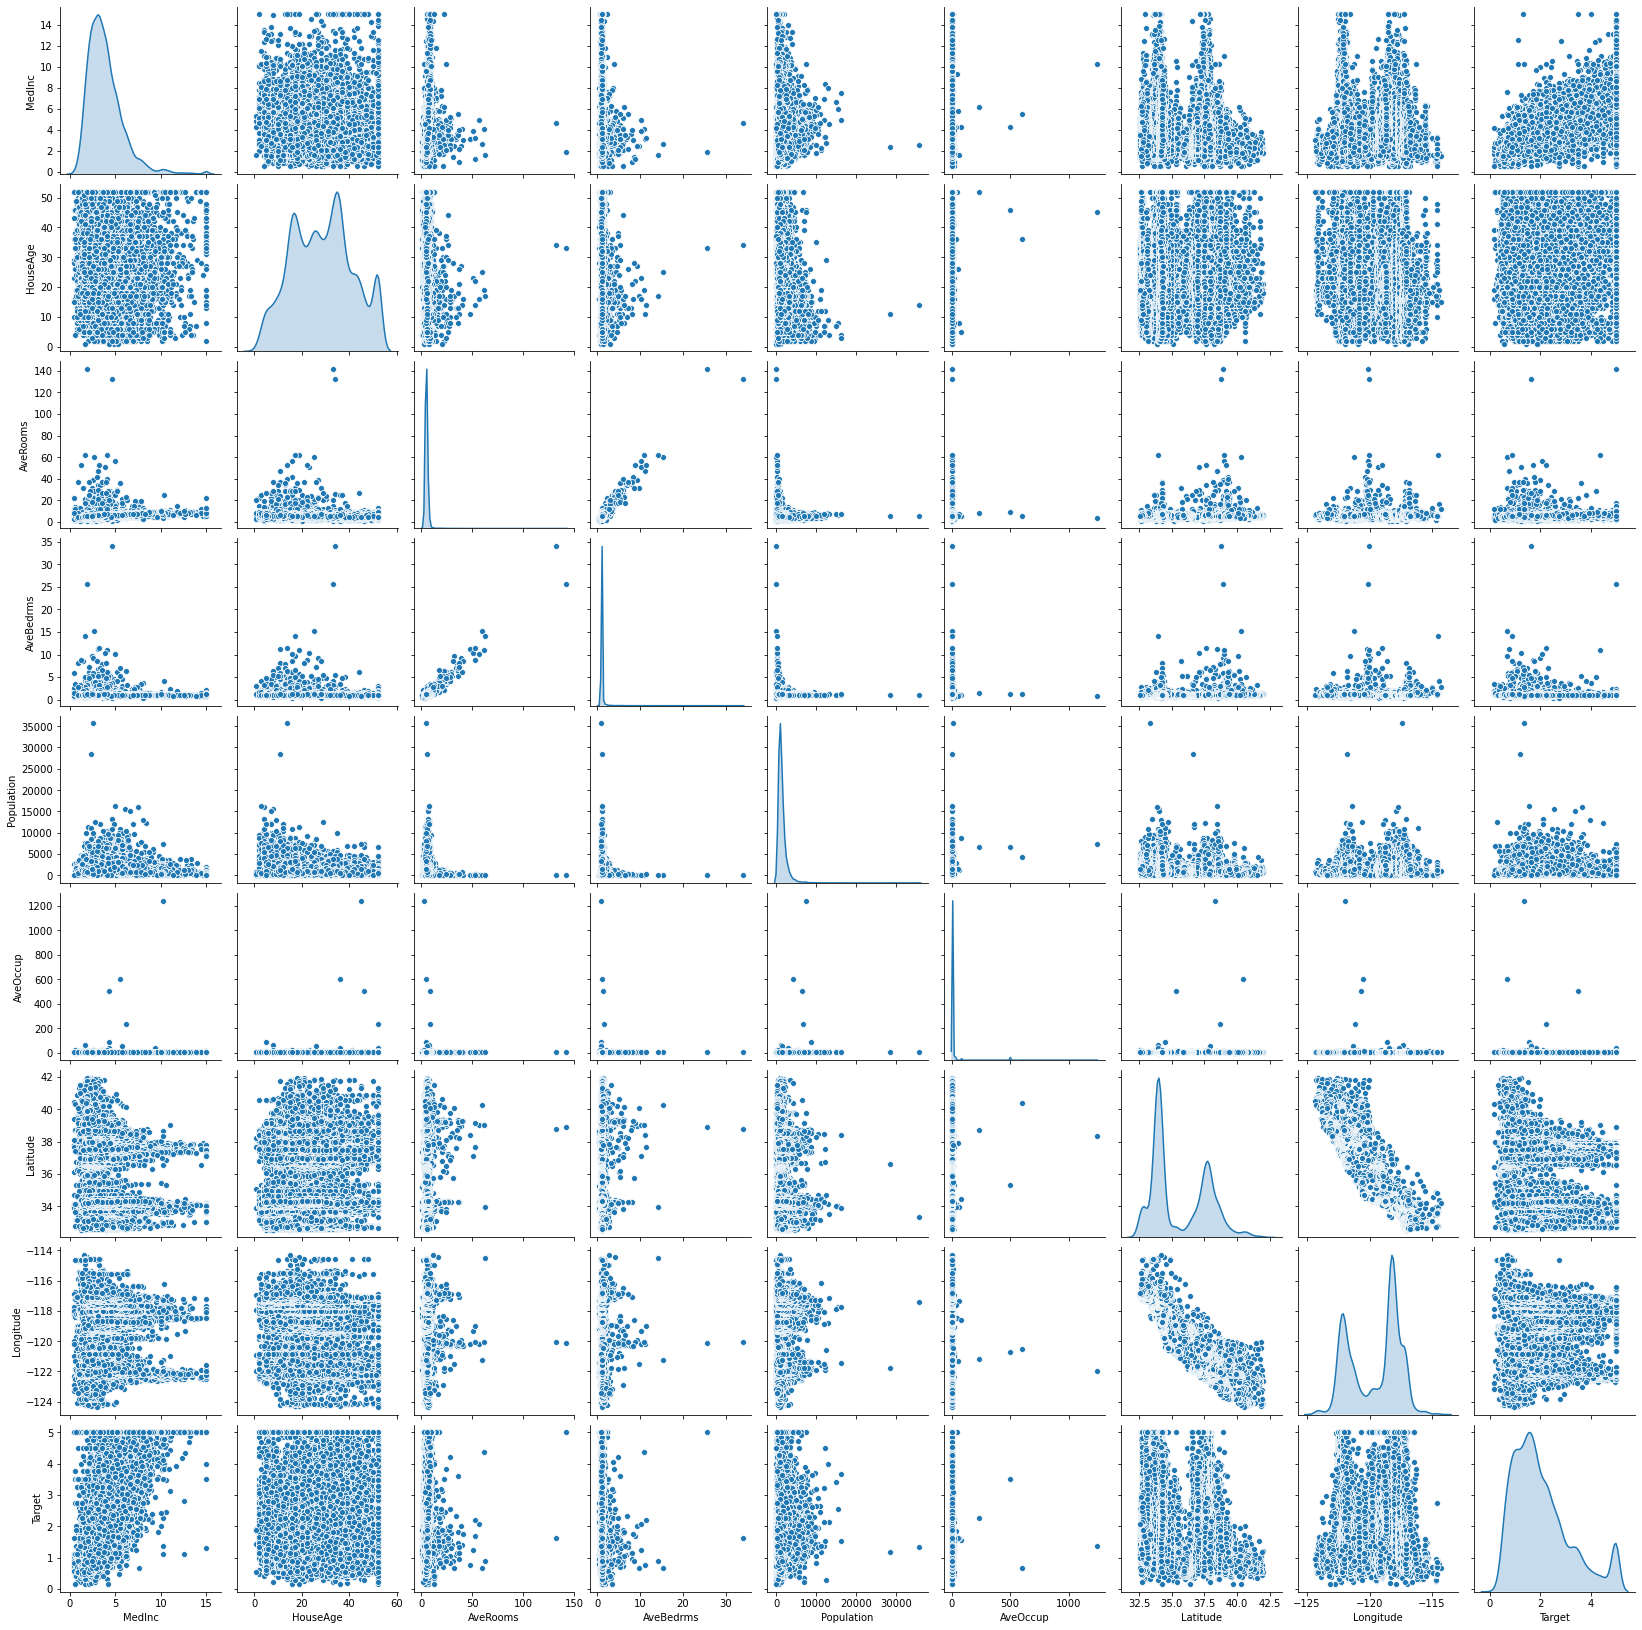

In [11]:
import seaborn as sns

sns.pairplot(df, diag_kind='kde')

## Insights from Pairplot

* 'HouseAge' vs 'Target' scatter plot depicts thats it is a weak attribute to predict Target.
* 'MedInc' has a little positive correlation with the independent variable.
* Most of the features are poor predictors, good accuracies may be not be achieved with these features.

<AxesSubplot:>

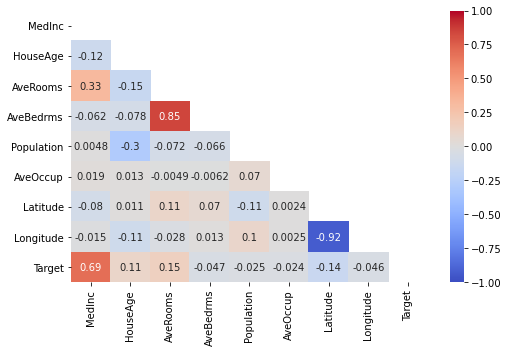

In [12]:
# Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), mask=np.triu(df.corr()), cmap='coolwarm', vmax=1, vmin=-1, annot = True)

## Split the Data into Train Test and Validation sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain, x_test, ytrain, y_test = train_test_split(h_df.data, h_df.target, test_size=0.2, random_state=10)
x_train, x_val, y_train, y_val = train_test_split(xtrain, ytrain, test_size=0.2, random_state=10)

In [15]:
print(len(x_train), len(x_val), len(x_test))

13209 3303 4128


## Normalize the Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
ss = StandardScaler()
X_train = ss.fit_transform(x_train)
# Only fit the training set, to avoid data leaks.
X_val = ss.transform(x_val)
X_test = ss.transform(x_test)

## Building Neural Network Model

In [18]:
model = tf.keras.models.Sequential()

In [19]:
model.add(tf.keras.layers.Dense(15, activation='relu', input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Dense(12, activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(8, activation = 'relu'))

model.add(tf.keras.layers.Dense(1))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
model.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.SGD(lr=1e-3))

In [21]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3)]
history = model.fit(X_train, y_train, epochs = 70, validation_data=(X_val,y_val),
                    callbacks=callbacks)

Train on 13209 samples, validate on 3303 samples
Epoch 1/70
13209/13209 [==============================] - 2s 144us/sample - loss: 1.5914 - val_loss: 1.1218
Epoch 2/70
13209/13209 [==============================] - 0s 26us/sample - loss: 1.0698 - val_loss: 0.9614
Epoch 3/70
13209/13209 [==============================] - 0s 26us/sample - loss: 0.9223 - val_loss: 0.8349
Epoch 4/70
13209/13209 [==============================] - 0s 29us/sample - loss: 0.8065 - val_loss: 0.7393
Epoch 5/70
13209/13209 [==============================] - 0s 28us/sample - loss: 0.7264 - val_loss: 0.6791
Epoch 6/70
13209/13209 [==============================] - 0s 25us/sample - loss: 0.6788 - val_loss: 0.6440
Epoch 7/70
13209/13209 [==============================] - 0s 27us/sample - loss: 0.6517 - val_loss: 0.6220
Epoch 8/70
13209/13209 [==============================] - 0s 29us/sample - loss: 0.6341 - val_loss: 0.6077
Epoch 9/70
13209/13209 [==============================] - 0s 28us/sample - loss: 0.6209 - val_

<AxesSubplot:>

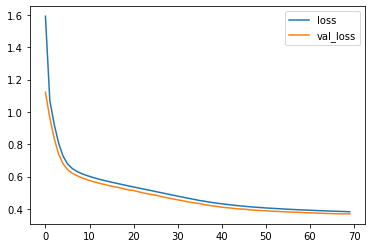

In [22]:
pd.DataFrame(history.history).plot()

In [23]:
model.evaluate(X_test, y_test)

4128/4128 [==============================] - 0s 17us/sample - loss: 0.4036


0.4035707824220953

In [24]:
model.predict(X_test)[:5]

array([[2.4703736],
       [2.8541188],
       [2.5459886],
       [1.2782817],
       [1.6373515]], dtype=float32)

In [25]:
y_test[:5]

array([1.674, 3.541, 1.602, 1.408, 1.078])

## Iterating for best Learning Rate

In [26]:
l_rate = [1e-2, 5e-3, 1e-3, 5e-4, 1e-4 ]
history = []
for i in l_rate:
    model = tf.keras.models.Sequential([tf.keras.layers.Dense(15, activation = 'relu'),
                                       tf.keras.layers.Dense(12, activation = 'sigmoid'),
                                       tf.keras.layers.Dense(8, activation = 'relu'),
                                       tf.keras.layers.Dense(1)])
    model.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.SGD(lr=i))
    callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]
    history.append(model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs =100,callbacks=callbacks))


Train on 13209 samples, validate on 3303 samples
Epoch 1/100
13209/13209 [==============================] - 0s 38us/sample - loss: 0.9568 - val_loss: 0.5471
Epoch 2/100
13209/13209 [==============================] - 0s 31us/sample - loss: 0.5021 - val_loss: 0.4509
Epoch 3/100
13209/13209 [==============================] - 1s 49us/sample - loss: 0.4422 - val_loss: 0.4075
Epoch 4/100
13209/13209 [==============================] - 1s 39us/sample - loss: 0.4101 - val_loss: 0.3884
Epoch 5/100
13209/13209 [==============================] - 0s 30us/sample - loss: 0.3965 - val_loss: 0.3748
Epoch 6/100
13209/13209 [==============================] - 0s 30us/sample - loss: 0.3873 - val_loss: 0.3682
Epoch 7/100
13209/13209 [==============================] - 1s 44us/sample - loss: 0.3800 - val_loss: 0.3953
Epoch 8/100
13209/13209 [==============================] - 0s 30us/sample - loss: 0.3754 - val_loss: 0.3590
Epoch 9/100
13209/13209 [==============================] - 0s 29us/sample - loss: 0.371

Epoch 14/100
13209/13209 [==============================] - 1s 40us/sample - loss: 0.4035 - val_loss: 0.3800
Epoch 15/100
13209/13209 [==============================] - 0s 34us/sample - loss: 0.3984 - val_loss: 0.3758
Epoch 16/100
13209/13209 [==============================] - 0s 33us/sample - loss: 0.3929 - val_loss: 0.3781
Epoch 17/100
13209/13209 [==============================] - 0s 33us/sample - loss: 0.3883 - val_loss: 0.3692
Epoch 18/100
13209/13209 [==============================] - 0s 30us/sample - loss: 0.3838 - val_loss: 0.3653
Epoch 19/100
13209/13209 [==============================] - 1s 45us/sample - loss: 0.3801 - val_loss: 0.3635
Epoch 20/100
13209/13209 [==============================] - 0s 30us/sample - loss: 0.3765 - val_loss: 0.3636
Epoch 21/100
13209/13209 [==============================] - 0s 32us/sample - loss: 0.3727 - val_loss: 0.3590
Epoch 22/100
13209/13209 [==============================] - 0s 31us/sample - loss: 0.3699 - val_loss: 0.3561
Epoch 23/100
13209/

13209/13209 [==============================] - 0s 31us/sample - loss: 1.1717 - val_loss: 1.1135
Epoch 5/100
13209/13209 [==============================] - 1s 48us/sample - loss: 1.0923 - val_loss: 1.0267
Epoch 6/100
13209/13209 [==============================] - 0s 29us/sample - loss: 1.0000 - val_loss: 0.9299
Epoch 7/100
13209/13209 [==============================] - 0s 30us/sample - loss: 0.9001 - val_loss: 0.8297
Epoch 8/100
13209/13209 [==============================] - 0s 31us/sample - loss: 0.8048 - val_loss: 0.7419
Epoch 9/100
13209/13209 [==============================] - 1s 41us/sample - loss: 0.7275 - val_loss: 0.6762
Epoch 10/100
13209/13209 [==============================] - 1s 49us/sample - loss: 0.6745 - val_loss: 0.6346
Epoch 11/100
13209/13209 [==============================] - 0s 29us/sample - loss: 0.6412 - val_loss: 0.6085
Epoch 12/100
13209/13209 [==============================] - 1s 41us/sample - loss: 0.6193 - val_loss: 0.5913
Epoch 13/100
13209/13209 [===========

13209/13209 [==============================] - 0s 28us/sample - loss: 0.3920 - val_loss: 0.3776
Epoch 80/100
13209/13209 [==============================] - 1s 42us/sample - loss: 0.3916 - val_loss: 0.3769
Epoch 81/100
13209/13209 [==============================] - 0s 28us/sample - loss: 0.3908 - val_loss: 0.3760
Epoch 82/100
13209/13209 [==============================] - 0s 28us/sample - loss: 0.3901 - val_loss: 0.3754
Epoch 83/100
13209/13209 [==============================] - 0s 33us/sample - loss: 0.3897 - val_loss: 0.3755
Epoch 84/100
13209/13209 [==============================] - 1s 42us/sample - loss: 0.3891 - val_loss: 0.3749
Epoch 85/100
13209/13209 [==============================] - 0s 29us/sample - loss: 0.3886 - val_loss: 0.3747
Epoch 86/100
13209/13209 [==============================] - 0s 36us/sample - loss: 0.3878 - val_loss: 0.3734
Epoch 87/100
13209/13209 [==============================] - 1s 45us/sample - loss: 0.3874 - val_loss: 0.3732
Epoch 88/100
13209/13209 [======

Epoch 54/100
13209/13209 [==============================] - 1s 48us/sample - loss: 0.4535 - val_loss: 0.4334
Epoch 55/100
13209/13209 [==============================] - 1s 40us/sample - loss: 0.4515 - val_loss: 0.4317
Epoch 56/100
13209/13209 [==============================] - 1s 39us/sample - loss: 0.4496 - val_loss: 0.4300
Epoch 57/100
13209/13209 [==============================] - 0s 38us/sample - loss: 0.4476 - val_loss: 0.4284
Epoch 58/100
13209/13209 [==============================] - 1s 38us/sample - loss: 0.4458 - val_loss: 0.4268
Epoch 59/100
13209/13209 [==============================] - 0s 38us/sample - loss: 0.4440 - val_loss: 0.4252
Epoch 60/100
13209/13209 [==============================] - 1s 39us/sample - loss: 0.4421 - val_loss: 0.4239
Epoch 61/100
13209/13209 [==============================] - 1s 39us/sample - loss: 0.4405 - val_loss: 0.4221
Epoch 62/100
13209/13209 [==============================] - 1s 42us/sample - loss: 0.4386 - val_loss: 0.4206
Epoch 63/100
13209/

13209/13209 [==============================] - 0s 35us/sample - loss: 1.2009 - val_loss: 1.1843
Epoch 29/100
13209/13209 [==============================] - 0s 30us/sample - loss: 1.1959 - val_loss: 1.1795
Epoch 30/100
13209/13209 [==============================] - 0s 37us/sample - loss: 1.1908 - val_loss: 1.1745
Epoch 31/100
13209/13209 [==============================] - 0s 33us/sample - loss: 1.1856 - val_loss: 1.1695
Epoch 32/100
13209/13209 [==============================] - 0s 28us/sample - loss: 1.1803 - val_loss: 1.1644
Epoch 33/100
13209/13209 [==============================] - 0s 34us/sample - loss: 1.1749 - val_loss: 1.1591
Epoch 34/100
13209/13209 [==============================] - 0s 28us/sample - loss: 1.1694 - val_loss: 1.1538
Epoch 35/100
13209/13209 [==============================] - 0s 30us/sample - loss: 1.1638 - val_loss: 1.1484
Epoch 36/100
13209/13209 [==============================] - 0s 29us/sample - loss: 1.1581 - val_loss: 1.1428
Epoch 37/100
13209/13209 [======

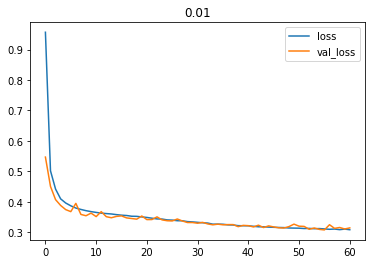

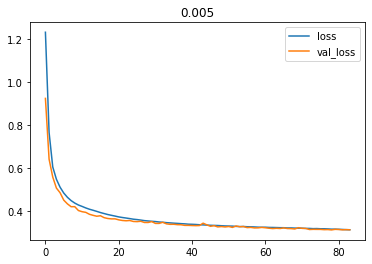

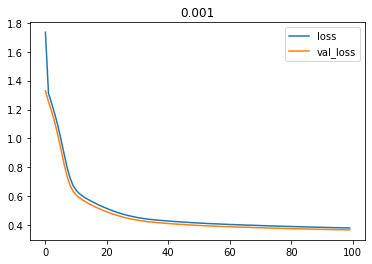

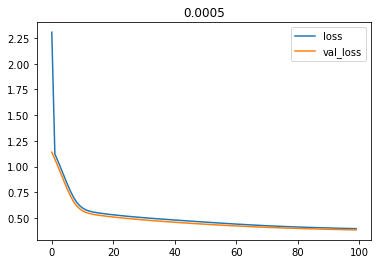

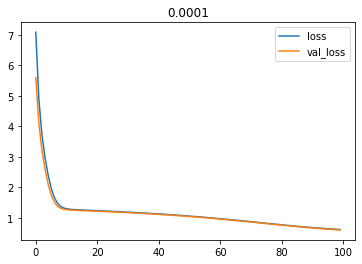

In [27]:
for learning_rate, h in zip(l_rate, history):
    pd.DataFrame(h.history).plot(title = learning_rate)

## Function to build Neural Network model

In [59]:
# Function to build Neural Network model based on the list of neurons and lerarning rate parameter.
# n_neurons = [12, 10 , 8] represents the numbers of neurons in  layers
def build_model(n_neurons=[15,12,8], l_rate =1e-3):
    model = tf.keras.models.Sequential()
    params ={"input_shape":X_train.shape[1:]}
    for n in n_neurons:
        model.add(tf.keras.layers.Dense(n, activation='relu', **params))
        params ={}
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.SGD(lr=l_rate))
    return model

In [60]:
K_models = tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [45]:
K_models.fit(X_train, y_train, epochs=100,
              validation_data=(X_val, y_val),
              callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

Train on 13209 samples, validate on 3303 samples
Epoch 1/100
13209/13209 [==============================] - 1s 47us/sample - loss: 1.6683 - val_loss: 0.9996
Epoch 2/100
13209/13209 [==============================] - 0s 30us/sample - loss: 0.7723 - val_loss: 0.7060
Epoch 3/100
13209/13209 [==============================] - 0s 28us/sample - loss: 0.6578 - val_loss: 0.6185
Epoch 4/100
13209/13209 [==============================] - 0s 29us/sample - loss: 0.6107 - val_loss: 0.5789
Epoch 5/100
13209/13209 [==============================] - 0s 29us/sample - loss: 0.5809 - val_loss: 0.5533
Epoch 6/100
13209/13209 [==============================] - 0s 29us/sample - loss: 0.5579 - val_loss: 0.5295
Epoch 7/100
13209/13209 [==============================] - 0s 29us/sample - loss: 0.5381 - val_loss: 0.5096
Epoch 8/100
13209/13209 [==============================] - 0s 29us/sample - loss: 0.5200 - val_loss: 0.4916
Epoch 9/100
13209/13209 [==============================] - 0s 29us/sample - loss: 0.503

Epoch 76/100
13209/13209 [==============================] - 0s 30us/sample - loss: 0.3531 - val_loss: 0.3550
Epoch 77/100
13209/13209 [==============================] - 0s 30us/sample - loss: 0.3524 - val_loss: 0.3546
Epoch 78/100
13209/13209 [==============================] - 0s 29us/sample - loss: 0.3520 - val_loss: 0.3543
Epoch 79/100
13209/13209 [==============================] - 0s 30us/sample - loss: 0.3511 - val_loss: 0.3538
Epoch 80/100
13209/13209 [==============================] - 0s 29us/sample - loss: 0.3508 - val_loss: 0.3539
Epoch 81/100
13209/13209 [==============================] - 0s 29us/sample - loss: 0.3500 - val_loss: 0.3515
Epoch 82/100
13209/13209 [==============================] - 0s 29us/sample - loss: 0.3494 - val_loss: 0.3519
Epoch 83/100
13209/13209 [==============================] - 0s 29us/sample - loss: 0.3487 - val_loss: 0.3513
Epoch 84/100
13209/13209 [==============================] - 0s 30us/sample - loss: 0.3482 - val_loss: 0.3508
Epoch 85/100
13209/

In [48]:
K_models.predict(X_test)[:3]

array([2.183613 , 2.8842473, 2.5071697], dtype=float32)

In [49]:
y_test[:3]

array([1.674, 3.541, 1.602])

## Hyperparameter Tuning

In [61]:
params_dic = {
    "n_neurons" :[[15,10], [15, 8], [12, 8],[12, 10], [15, 12, 8], [15, 10, 8], [15, 10, 5]],
    "l_rate" : [5e-2, 3e-2, 1e-2, 8e-3, 5e-3, 3e-3, 1e-3, 5e-4 ]
}

In [62]:
from sklearn.model_selection import RandomizedSearchCV

rnd_search_cv = RandomizedSearchCV(K_models, params_dic, n_iter=10, cv=3)

In [63]:
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_val, y_val),
                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

Train on 8806 samples, validate on 3303 samples
Epoch 1/100
8806/8806 [==============================] - 1s 107us/sample - loss: 0.5966 - val_loss: 0.4972
Epoch 2/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.4363 - val_loss: 0.3919
Epoch 3/100
8806/8806 [==============================] - 0s 37us/sample - loss: 0.3945 - val_loss: 0.3883
Epoch 4/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.3794 - val_loss: 0.3976
Epoch 5/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.3805 - val_loss: 0.3582
Epoch 6/100
8806/8806 [==============================] - 0s 34us/sample - loss: 0.3594 - val_loss: 0.3918
Epoch 7/100
8806/8806 [==============================] - 0s 35us/sample - loss: 0.3571 - val_loss: 0.4559
Epoch 8/100
8806/8806 [==============================] - 0s 36us/sample - loss: 0.3538 - val_loss: 0.3523
Epoch 9/100
8806/8806 [==============================] - 0s 36us/sample - loss: 0.3474 - val_loss: 0.38

Epoch 41/100
8806/8806 [==============================] - 0s 35us/sample - loss: 0.3161 - val_loss: 0.3268
Epoch 42/100
8806/8806 [==============================] - 0s 34us/sample - loss: 0.3194 - val_loss: 0.3164
Epoch 43/100
8806/8806 [==============================] - 0s 37us/sample - loss: 0.3169 - val_loss: 0.6413
Epoch 44/100
8806/8806 [==============================] - 0s 36us/sample - loss: 0.3276 - val_loss: 0.3495
Epoch 45/100
8806/8806 [==============================] - 0s 35us/sample - loss: 0.3247 - val_loss: 0.3333
Epoch 46/100
8806/8806 [==============================] - 0s 35us/sample - loss: 0.3189 - val_loss: 0.3213
Epoch 47/100
8806/8806 [==============================] - 0s 35us/sample - loss: 0.3158 - val_loss: 0.3220
Epoch 48/100
4403/4403 [==============================] - 0s 18us/sample - loss: 0.3047
Train on 8806 samples, validate on 3303 samples
Epoch 1/100
8806/8806 [==============================] - 1s 107us/sample - loss: 0.7631 - val_loss: 0.4910
Epoch 2/

8806/8806 [==============================] - 0s 38us/sample - loss: 0.3188 - val_loss: 0.3340
Epoch 41/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.3187 - val_loss: 0.3351
Epoch 42/100
8806/8806 [==============================] - 0s 36us/sample - loss: 0.3165 - val_loss: 0.3359
Epoch 43/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.3187 - val_loss: 0.3295
Epoch 44/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.3138 - val_loss: 0.3326
Epoch 45/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.3150 - val_loss: 0.3370
Epoch 46/100
8806/8806 [==============================] - 0s 37us/sample - loss: 0.3144 - val_loss: 0.3318
Epoch 47/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.3136 - val_loss: 0.3308
Epoch 48/100
8806/8806 [==============================] - ETA: 0s - loss: 0.3146- ETA: 0s - loss: 0 - 0s 39us/sample - loss: 0.3131 - val_loss: 0.3340
Epoch 

8806/8806 [==============================] - 0s 38us/sample - loss: 0.3975 - val_loss: 0.4168
Epoch 8/100
8806/8806 [==============================] - 0s 36us/sample - loss: 0.3902 - val_loss: 0.3744
Epoch 9/100
8806/8806 [==============================] - 0s 36us/sample - loss: 0.3825 - val_loss: 0.3692
Epoch 10/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.3775 - val_loss: 0.3689
Epoch 11/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.3756 - val_loss: 0.3632
Epoch 12/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.3706 - val_loss: 0.3592
Epoch 13/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.3683 - val_loss: 0.3697
Epoch 14/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.3675 - val_loss: 0.3721
Epoch 15/100
8806/8806 [==============================] - 0s 37us/sample - loss: 0.3653 - val_loss: 0.3674
Epoch 16/100
8806/8806 [============================

8806/8806 [==============================] - 0s 38us/sample - loss: 0.3062 - val_loss: 0.3232
Epoch 84/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.3053 - val_loss: 0.3307
Epoch 85/100
8806/8806 [==============================] - 0s 36us/sample - loss: 0.3060 - val_loss: 0.3196
Epoch 86/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.3041 - val_loss: 0.3202
Epoch 87/100
8806/8806 [==============================] - 0s 36us/sample - loss: 0.3034 - val_loss: 0.3198
Epoch 88/100
8806/8806 [==============================] - 0s 37us/sample - loss: 0.3029 - val_loss: 0.3204
Epoch 89/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.3024 - val_loss: 0.3198
Epoch 90/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.3019 - val_loss: 0.3302
Epoch 91/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.3019 - val_loss: 0.3287
Epoch 92/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 40us/sample - loss: 0.3291 - val_loss: 0.3303
Epoch 19/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3274 - val_loss: 0.3700
Epoch 20/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3245 - val_loss: 0.6383
Epoch 21/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3209 - val_loss: 0.3227
Epoch 22/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3181 - val_loss: 0.3949
Epoch 23/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3219 - val_loss: 0.4556
Epoch 24/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.6096 - val_loss: 1.3891
Epoch 25/100
8806/8806 [==============================] - 0s 40us/sample - loss: 1.2133 - val_loss: 1.1459
Epoch 26/100
8806/8806 [==============================] - 0s 40us/sample - loss: 1.1552 - val_loss: 0.7034
Epoch 27/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 40us/sample - loss: 0.3184 - val_loss: 0.3816
Epoch 63/100
8806/8806 [==============================] - 0s 44us/sample - loss: 0.3228 - val_loss: 0.3518
Epoch 64/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.3174 - val_loss: 0.3295
Epoch 65/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.3177 - val_loss: 0.3513
Epoch 66/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.3178 - val_loss: 0.3708
Epoch 67/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.3202 - val_loss: 0.3299
Epoch 68/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.3175 - val_loss: 0.3336
Epoch 69/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.3170 - val_loss: 0.3371
Epoch 70/100
4403/4403 [==============================] - 0s 20us/sample - loss: 0.3776
Train on 8806 samples, validate on 3303 samples
Epoch 1/100
8806/8806

8806/8806 [==============================] - 0s 41us/sample - loss: 0.3312 - val_loss: 0.3330
Epoch 25/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3284 - val_loss: 0.3299
Epoch 26/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3282 - val_loss: 0.3490
Epoch 27/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3250 - val_loss: 0.3389
Epoch 28/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3238 - val_loss: 0.3313
Epoch 29/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.3231 - val_loss: 0.3354
Epoch 30/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3350 - val_loss: 0.3320
Epoch 31/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3255 - val_loss: 0.3375
Epoch 32/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3219 - val_loss: 0.3227
Epoch 33/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 41us/sample - loss: 0.3129 - val_loss: 0.3307
Epoch 58/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3127 - val_loss: 0.3356
Epoch 59/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3116 - val_loss: 0.3269
Epoch 60/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3107 - val_loss: 0.3412
Epoch 61/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3111 - val_loss: 0.3379
Epoch 62/100
8806/8806 [==============================] - ETA: 0s - loss: 0.312 - 0s 45us/sample - loss: 0.3113 - val_loss: 0.3608
Epoch 63/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3099 - val_loss: 0.3295
Epoch 64/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3097 - val_loss: 0.3275
Epoch 65/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3084 - val_loss: 0.3256
Epoch 66/100
8806/8806 [==

8806/8806 [==============================] - 0s 41us/sample - loss: 0.3661 - val_loss: 0.3540
Epoch 33/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3646 - val_loss: 0.3532
Epoch 34/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3632 - val_loss: 0.3499
Epoch 35/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3627 - val_loss: 0.3549
Epoch 36/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3614 - val_loss: 0.3507
Epoch 37/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3610 - val_loss: 0.3535
Epoch 38/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3600 - val_loss: 0.3500
Epoch 39/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3593 - val_loss: 0.3476
Epoch 40/100
8806/8806 [==============================] - 0s 43us/sample - loss: 0.3579 - val_loss: 0.3534
Epoch 41/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 41us/sample - loss: 0.4081 - val_loss: 0.3874
Epoch 10/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.4033 - val_loss: 0.3912
Epoch 11/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3955 - val_loss: 0.3776
Epoch 12/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3881 - val_loss: 0.3759
Epoch 13/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3829 - val_loss: 0.3713
Epoch 14/100
8806/8806 [==============================] - 0s 44us/sample - loss: 0.3790 - val_loss: 0.3700
Epoch 15/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3754 - val_loss: 0.3647
Epoch 16/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3728 - val_loss: 0.3635
Epoch 17/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3694 - val_loss: 0.3607
Epoch 18/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 41us/sample - loss: 0.2993 - val_loss: 0.3179
Epoch 86/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3003 - val_loss: 0.3141
Epoch 87/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.2998 - val_loss: 0.3141
Epoch 88/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.2989 - val_loss: 0.3423
Epoch 89/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.2980 - val_loss: 0.3179
Epoch 90/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.2974 - val_loss: 0.3130
Epoch 91/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.2978 - val_loss: 0.3116
Epoch 92/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.2980 - val_loss: 0.3219
Epoch 93/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.2973 - val_loss: 0.3183
Epoch 94/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 44us/sample - loss: 0.3182 - val_loss: 0.3349
Epoch 61/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3160 - val_loss: 0.3320
Epoch 62/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3159 - val_loss: 0.3547
Epoch 63/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3178 - val_loss: 0.3306
Epoch 64/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3146 - val_loss: 0.3351
Epoch 65/100
8806/8806 [==============================] - 0s 43us/sample - loss: 0.3143 - val_loss: 0.3289
Epoch 66/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3132 - val_loss: 0.3651
Epoch 67/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3193 - val_loss: 0.3308
Epoch 68/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3141 - val_loss: 0.3283
Epoch 69/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 41us/sample - loss: 0.3457 - val_loss: 0.3605
Epoch 36/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3442 - val_loss: 0.3401
Epoch 37/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3424 - val_loss: 0.3414
Epoch 38/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3411 - val_loss: 0.3353
Epoch 39/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.3392 - val_loss: 0.3560
Epoch 40/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3390 - val_loss: 0.3491
Epoch 41/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3375 - val_loss: 0.3849
Epoch 42/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3364 - val_loss: 0.3683
Epoch 43/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3357 - val_loss: 0.3273
Epoch 44/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 45us/sample - loss: 0.3189 - val_loss: 0.3222
Epoch 58/100
8806/8806 [==============================] - 0s 44us/sample - loss: 0.3172 - val_loss: 0.3282
Epoch 59/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3163 - val_loss: 0.3247
Epoch 60/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3156 - val_loss: 0.3267
Epoch 61/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3150 - val_loss: 0.3154
Epoch 62/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3142 - val_loss: 0.3132
Epoch 63/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3143 - val_loss: 0.3195
Epoch 64/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3131 - val_loss: 0.3136
Epoch 65/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3126 - val_loss: 0.3142
Epoch 66/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 42us/sample - loss: 0.4898 - val_loss: 0.4545
Epoch 33/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.4847 - val_loss: 0.4499
Epoch 34/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.4802 - val_loss: 0.4447
Epoch 35/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.4760 - val_loss: 0.4404
Epoch 36/100
8806/8806 [==============================] - 0s 45us/sample - loss: 0.4718 - val_loss: 0.4362
Epoch 37/100
8806/8806 [==============================] - 0s 43us/sample - loss: 0.4678 - val_loss: 0.4323
Epoch 38/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.4641 - val_loss: 0.4288
Epoch 39/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.4605 - val_loss: 0.4257
Epoch 40/100
8806/8806 [==============================] - 0s 43us/sample - loss: 0.4571 - val_loss: 0.4227
Epoch 41/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 45us/sample - loss: 0.6570 - val_loss: 0.6786
Epoch 8/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.6412 - val_loss: 0.6560
Epoch 9/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.6260 - val_loss: 0.6359
Epoch 10/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.6129 - val_loss: 0.6187
Epoch 11/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.6003 - val_loss: 0.6034
Epoch 12/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.5887 - val_loss: 0.5899
Epoch 13/100
8806/8806 [==============================] - 0s 43us/sample - loss: 0.5779 - val_loss: 0.5772
Epoch 14/100
8806/8806 [==============================] - 0s 43us/sample - loss: 0.5675 - val_loss: 0.5644
Epoch 15/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.5576 - val_loss: 0.5533
Epoch 16/100
8806/8806 [============================

8806/8806 [==============================] - 0s 44us/sample - loss: 0.3903 - val_loss: 0.3927
Epoch 84/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3895 - val_loss: 0.3920
Epoch 85/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3890 - val_loss: 0.3918
Epoch 86/100
8806/8806 [==============================] - 0s 44us/sample - loss: 0.3884 - val_loss: 0.3908
Epoch 87/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3879 - val_loss: 0.3906
Epoch 88/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3871 - val_loss: 0.3897
Epoch 89/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3865 - val_loss: 0.3885
Epoch 90/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3859 - val_loss: 0.3880
Epoch 91/100
8806/8806 [==============================] - 0s 43us/sample - loss: 0.3856 - val_loss: 0.3875
Epoch 92/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 43us/sample - loss: 0.4636 - val_loss: 0.4455
Epoch 59/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.4608 - val_loss: 0.4431
Epoch 60/100
8806/8806 [==============================] - 0s 44us/sample - loss: 0.4579 - val_loss: 0.4399
Epoch 61/100
8806/8806 [==============================] - 0s 45us/sample - loss: 0.4557 - val_loss: 0.4385
Epoch 62/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.4533 - val_loss: 0.4354
Epoch 63/100
8806/8806 [==============================] - 0s 47us/sample - loss: 0.4513 - val_loss: 0.4333
Epoch 64/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.4490 - val_loss: 0.4314
Epoch 65/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.4472 - val_loss: 0.4301
Epoch 66/100
8806/8806 [==============================] - 0s 46us/sample - loss: 0.4447 - val_loss: 0.4273
Epoch 67/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 44us/sample - loss: 0.3114 - val_loss: 0.3319
Epoch 34/100
8806/8806 [==============================] - 0s 46us/sample - loss: 0.3111 - val_loss: 0.3409
Epoch 35/100
8806/8806 [==============================] - 0s 48us/sample - loss: 0.3125 - val_loss: 0.3383
Epoch 36/100
8806/8806 [==============================] - 0s 47us/sample - loss: 0.3116 - val_loss: 0.3461
Epoch 37/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3083 - val_loss: 0.3466
Epoch 38/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3102 - val_loss: 0.3357
Epoch 39/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3095 - val_loss: 0.3252
Epoch 40/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3079 - val_loss: 0.3498
Epoch 41/100
8806/8806 [==============================] - 0s 43us/sample - loss: 0.3057 - val_loss: 0.3844
Epoch 42/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 42us/sample - loss: 0.3292 - val_loss: 0.3296
Epoch 31/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3287 - val_loss: 0.3485
Epoch 32/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3259 - val_loss: 0.4557
Epoch 33/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3275 - val_loss: 0.3259
Epoch 34/100
8806/8806 [==============================] - 0s 45us/sample - loss: 0.3246 - val_loss: 0.3321
Epoch 35/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3212 - val_loss: 0.3431
Epoch 36/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3220 - val_loss: 0.3281
Epoch 37/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3208 - val_loss: 0.3361
Epoch 38/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3181 - val_loss: 0.3483
Epoch 39/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 43us/sample - loss: 0.3446 - val_loss: 0.3599
Epoch 12/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3425 - val_loss: 0.3890
Epoch 13/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3482 - val_loss: 0.5757
Epoch 14/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.3427 - val_loss: 0.3551
Epoch 15/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3346 - val_loss: 0.3516
Epoch 16/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3346 - val_loss: 0.3311
Epoch 17/100
8806/8806 [==============================] - 0s 43us/sample - loss: 0.3287 - val_loss: 0.3268
Epoch 18/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3249 - val_loss: 0.3619
Epoch 19/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3254 - val_loss: 0.3173
Epoch 20/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 40us/sample - loss: 0.3884 - val_loss: 0.3905
Epoch 54/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3870 - val_loss: 0.3886
Epoch 55/100
8806/8806 [==============================] - 0s 49us/sample - loss: 0.3860 - val_loss: 0.3883
Epoch 56/100
8806/8806 [==============================] - 0s 46us/sample - loss: 0.3845 - val_loss: 0.3879
Epoch 57/100
8806/8806 [==============================] - 0s 43us/sample - loss: 0.3830 - val_loss: 0.3868
Epoch 58/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3821 - val_loss: 0.3863
Epoch 59/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3806 - val_loss: 0.3857
Epoch 60/100
8806/8806 [==============================] - 0s 43us/sample - loss: 0.3800 - val_loss: 0.3853
Epoch 61/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3788 - val_loss: 0.3864
Epoch 62/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 42us/sample - loss: 0.4191 - val_loss: 0.3939
Epoch 29/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.4152 - val_loss: 0.3922
Epoch 30/100
8806/8806 [==============================] - 0s 46us/sample - loss: 0.4107 - val_loss: 0.3863
Epoch 31/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.4075 - val_loss: 0.3849
Epoch 32/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.4041 - val_loss: 0.3802
Epoch 33/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.4008 - val_loss: 0.3763
Epoch 34/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3983 - val_loss: 0.3741
Epoch 35/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.3957 - val_loss: 0.3726
Epoch 36/100
8806/8806 [==============================] - 0s 38us/sample - loss: 0.3934 - val_loss: 0.3734
Epoch 37/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 46us/sample - loss: 0.7133 - val_loss: 0.6574
Epoch 4/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.6808 - val_loss: 0.6310
Epoch 5/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.6547 - val_loss: 0.6070
Epoch 6/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.6316 - val_loss: 0.5875
Epoch 7/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.6122 - val_loss: 0.5698
Epoch 8/100
8806/8806 [==============================] - 0s 44us/sample - loss: 0.5938 - val_loss: 0.5522
Epoch 9/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.5771 - val_loss: 0.5384
Epoch 10/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.5619 - val_loss: 0.5257
Epoch 11/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.5470 - val_loss: 0.5144
Epoch 12/100
8806/8806 [==============================] 

8806/8806 [==============================] - 0s 43us/sample - loss: 0.3694 - val_loss: 0.3713
Epoch 80/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.3687 - val_loss: 0.3706
Epoch 81/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3681 - val_loss: 0.3707
Epoch 82/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3677 - val_loss: 0.3711
Epoch 83/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.3670 - val_loss: 0.3687
Epoch 84/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3663 - val_loss: 0.3687
Epoch 85/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3659 - val_loss: 0.3688
Epoch 86/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.3653 - val_loss: 0.3677
Epoch 87/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.3646 - val_loss: 0.3675
Epoch 88/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 45us/sample - loss: 0.4276 - val_loss: 0.4238
Epoch 55/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.4260 - val_loss: 0.4223
Epoch 56/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.4245 - val_loss: 0.4209
Epoch 57/100
8806/8806 [==============================] - 0s 43us/sample - loss: 0.4230 - val_loss: 0.4197
Epoch 58/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.4215 - val_loss: 0.4186
Epoch 59/100
8806/8806 [==============================] - 0s 41us/sample - loss: 0.4201 - val_loss: 0.4174
Epoch 60/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.4187 - val_loss: 0.4163
Epoch 61/100
8806/8806 [==============================] - 0s 43us/sample - loss: 0.4175 - val_loss: 0.4147
Epoch 62/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.4161 - val_loss: 0.4136
Epoch 63/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 41us/sample - loss: 0.5224 - val_loss: 0.5562
Epoch 30/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.5185 - val_loss: 0.5494
Epoch 31/100
8806/8806 [==============================] - 0s 44us/sample - loss: 0.5148 - val_loss: 0.5425
Epoch 32/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.5110 - val_loss: 0.5360
Epoch 33/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.5073 - val_loss: 0.5300
Epoch 34/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.5039 - val_loss: 0.5240
Epoch 35/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.5005 - val_loss: 0.5182
Epoch 36/100
8806/8806 [==============================] - 0s 46us/sample - loss: 0.4973 - val_loss: 0.5129
Epoch 37/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.4941 - val_loss: 0.5079
Epoch 38/100
8806/8806 [==========================

8806/8806 [==============================] - 0s 40us/sample - loss: 1.3473 - val_loss: 1.2309
Epoch 5/100
8806/8806 [==============================] - 0s 39us/sample - loss: 1.0964 - val_loss: 1.0392
Epoch 6/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.9388 - val_loss: 0.9065
Epoch 7/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.8338 - val_loss: 0.8138
Epoch 8/100
8806/8806 [==============================] - 0s 44us/sample - loss: 0.7642 - val_loss: 0.7502
Epoch 9/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.7175 - val_loss: 0.7070
Epoch 10/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.6855 - val_loss: 0.6741
Epoch 11/100
8806/8806 [==============================] - 0s 43us/sample - loss: 0.6622 - val_loss: 0.6506
Epoch 12/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.6439 - val_loss: 0.6319
Epoch 13/100
8806/8806 [==============================]

8806/8806 [==============================] - 0s 42us/sample - loss: 0.4234 - val_loss: 0.4103
Epoch 81/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.4224 - val_loss: 0.4097
Epoch 82/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.4209 - val_loss: 0.4081
Epoch 83/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.4197 - val_loss: 0.4071
Epoch 84/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.4187 - val_loss: 0.4060
Epoch 85/100
8806/8806 [==============================] - 0s 39us/sample - loss: 0.4176 - val_loss: 0.4053
Epoch 86/100
8806/8806 [==============================] - 0s 43us/sample - loss: 0.4163 - val_loss: 0.4043
Epoch 87/100
8806/8806 [==============================] - 0s 42us/sample - loss: 0.4154 - val_loss: 0.4039
Epoch 88/100
8806/8806 [==============================] - 0s 40us/sample - loss: 0.4144 - val_loss: 0.4032
Epoch 89/100
8806/8806 [==========================

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000199FEA7A348>, as the constructor either does not set or modifies parameter n_neurons

In [64]:
rnd_search_cv.best_params_

{'n_neurons': [15, 10, 5], 'l_rate': 0.005}

In [65]:
rnd_search_cv.best_score_

-0.32107183588102534